# **Investigating Salary Trends In The Data Science Industry**

In [1]:
library(tidyverse)
library(infer)
library(cowplot)
library(broom)
library(gridExtra)
library(dplyr)
library(ggplot2)
library(tidymodels)
library(leaps)
library(scales)
library(caret)
library(nnet)
library(glmnet)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ recipes      1.1.0     ✔ yardstick    1.3.1
✔ rsam

## Introduction

In the rapidly evolving field of data science, salaries in this industry are shaped by various factors such as experience level (Entry level, Junior, Manager, Senior, Executive), job title (Data Analyst, Machine Learning Engineer, etc), type of employment (part time, full time, internship, etc), and many more. It is crucial for the companies to deep dive into these factors to offer competitive salaries and for professionals to be aware of the modern technologies as they advance in their careers due to the growing demand of the field (DuBois, J. (2020). The Data Scientist Shortage in 2020)

In this report, we seek to build on previous findings (Lothe, P. D., Tiwari, P., Patil, N., Patil, S., & Patil, V. (2021)) by focusing specifically on the data science industry. This report examines the influence of experience levels, job titles, and remote work arrangements on salary variations. By analyzing a dataset of 607 entries from the year 2021, which details various aspects of employment and compensation in data science roles. Our study aims to address the central question:

## Predictive Question:

**How does experience level, job title, company size, employment type and salary currency affect the salary of an employee?**

- Explanotary variables: `experience_level`, `job_title`, `company_size`, `employment_type`, `salary_currency`
- Response variable: `salary_in_usd`

## About Dataset

The link to the dataset - https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data

This Data was obtained from Kaggle.com, the dataset was creted using information availabl on ai-jobs.net. The dataset comprises 607 observations related to Data Science positions, encompassing various details about salaries as outlined below. Columns and their descriptions are listed below:

1. **work_year** - The year the salary was paid

2. **experience_level** - The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

3. **employment_type** - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

4. **job_title** - The role worked in during the year.

5. **salary** - The total gross salary amount paid.

6. **salary_currency** - The currency of the salary paid as an ISO 4217 currency code.

7. **salary_in_usd** - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)

8. **employee_residence** - Employee's primary country of residence in during the work year as an ISO 3166 country code.

9. **remote_ratio** - The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

10. **company_location** - The country of the employer's main office or contracting branch as an ISO 3166 country code.

11. **company_size** - The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [2]:
url <- "https://raw.githubusercontent.com/OwenWen00/coop-projects/refs/heads/main/ds_salaries.csv"

salary_data <- read.csv(url)

head(salary_data)

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


## Plot

To analyze how different categorical variables relate to **salary_in_usd**, I will examine the relationships between **salary_in_usd** and the following categorical variables: **experience_level**, **employment_type**, **company_size**, **remote_ratio**, and **work_year**. This comparison will help identify patterns and potential influences these variables have on salary outcomes. By examining these variables through box plots, we can gain insights into the distribution and central tendencies of salaries within each category, aiding in the understanding of which factors might significantly impact salary levels.

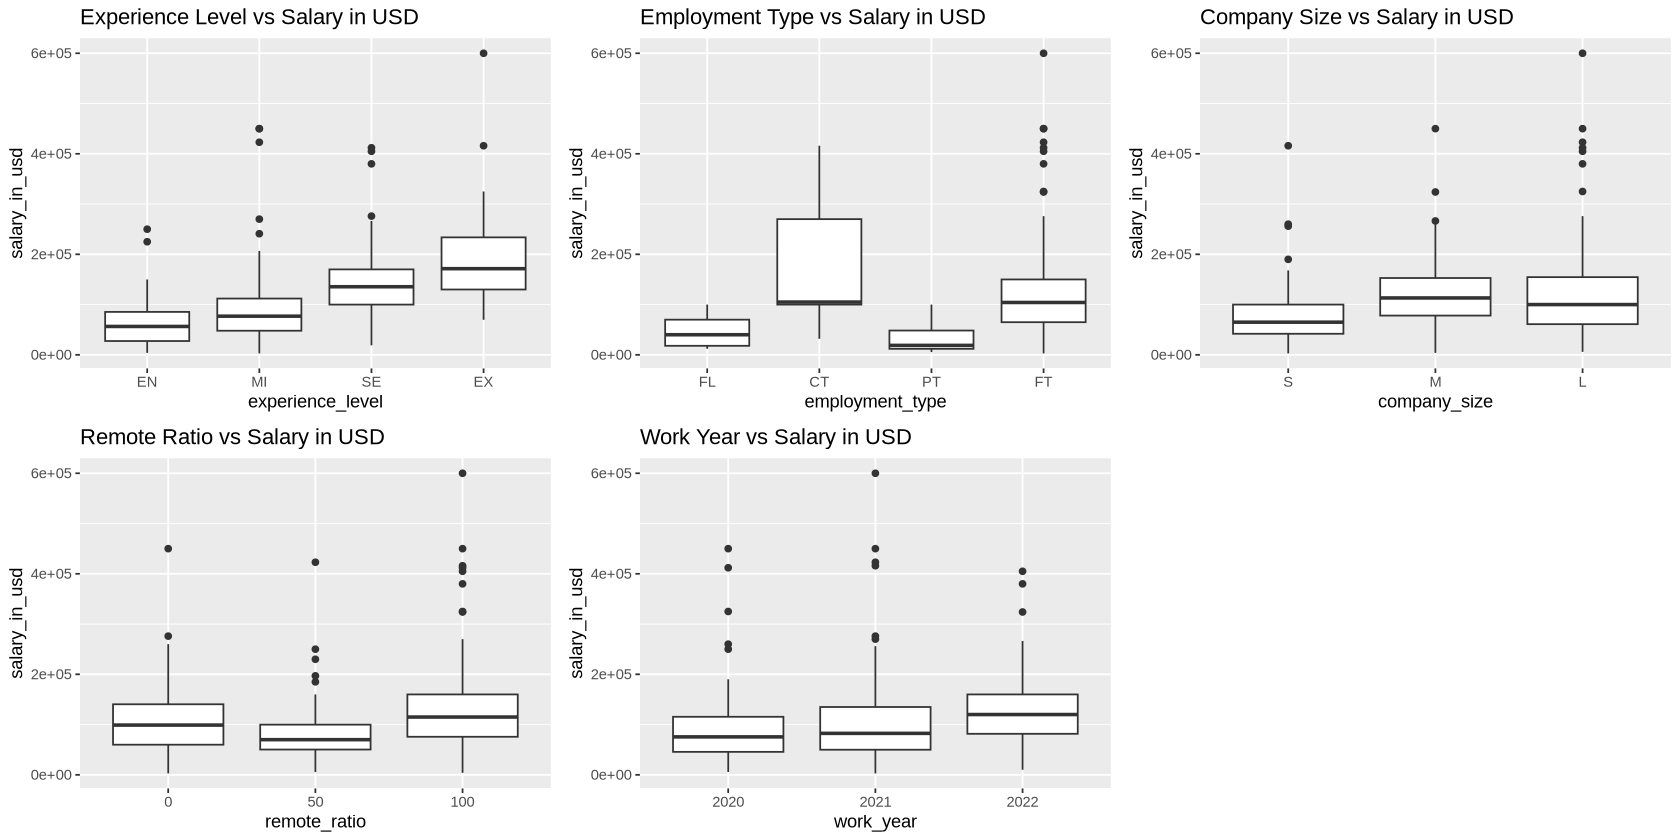

In [3]:
options(repr.plot.width = 14, repr.plot.height = 7) 

salary_data$experience_level <- factor(salary_data$experience_level, levels = c("EN", "MI", "SE", "EX"))
salary_data$company_size <- factor(salary_data$company_size, levels = c("S", "M", "L"))
salary_data$employment_type <- factor(salary_data$employment_type, levels = c("FL", "CT", "PT", "FT"))
salary_data$remote_ratio <- factor(salary_data$remote_ratio, levels = sort(unique(salary_data$remote_ratio)))
salary_data$work_year <- factor(salary_data$work_year, levels = sort(unique(salary_data$work_year)))

plot1 <- ggplot(salary_data, aes(x = experience_level, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Experience Level vs Salary in USD")

plot2 <- ggplot(salary_data, aes(x = employment_type, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Employment Type vs Salary in USD")

plot3 <- ggplot(salary_data, aes(x = company_size, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Company Size vs Salary in USD")

plot4 <- ggplot(salary_data, aes(x = remote_ratio, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Remote Ratio vs Salary in USD")

plot5 <- ggplot(salary_data, aes(x = work_year, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Work Year vs Salary in USD")

grid.arrange(plot1, plot2, plot3, plot4, plot5, ncol = 3)

## Plots Related To Questions
### Salary Distribution by Location and Job title

The plot below is a box plot depicting the distribution of avg salaries (in USD) across different locations and job titles:

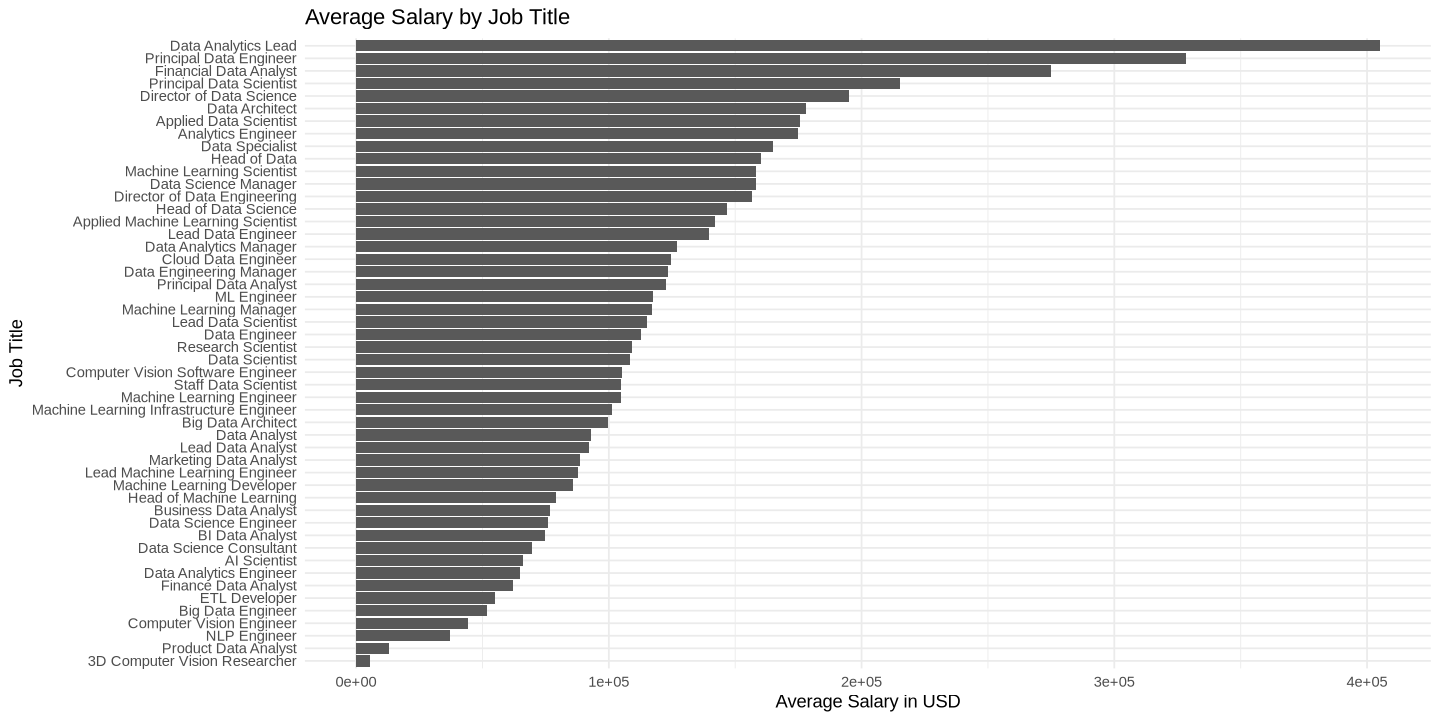

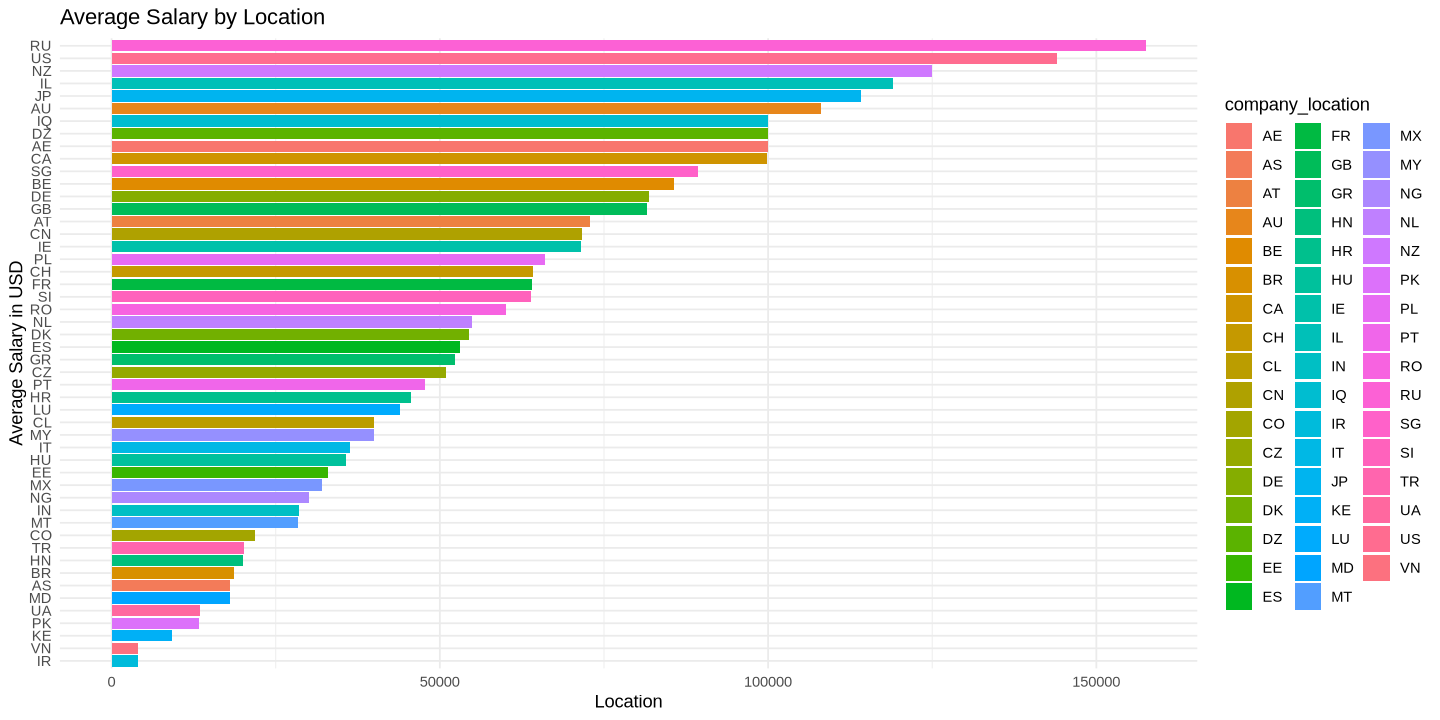

In [4]:
options(repr.plot.width = 12, repr.plot.height = 6) 

avg_salary_by_location <- salary_data %>%
  group_by(company_location) %>%
  summarise(avg_salary_in_usd = mean(salary_in_usd, na.rm = TRUE)) %>%
  arrange(avg_salary_in_usd)


plot_location <- ggplot(avg_salary_by_location, aes(x = avg_salary_in_usd, y = reorder(company_location, avg_salary_in_usd), fill = company_location)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Salary by Location", x = "Location", y = "Average Salary in USD") 

avg_salary_by_job_title <- salary_data %>%
  group_by(job_title) %>%
  summarise(avg_salary_in_usd = mean(salary_in_usd, na.rm = TRUE)) %>%
  arrange(avg_salary_in_usd) # Sort by average salary

plot_job_title <- ggplot(avg_salary_by_job_title, aes(x = avg_salary_in_usd, y = reorder(job_title, avg_salary_in_usd))) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Salary by Job Title", x = "Average Salary in USD", y = "Job Title")



plot_job_title
plot_location

## Salary Distribution by Experience Level and Company Size

The plot below is a box plot depicting the distribution of salaries (in USD) across different experience levels, categorized further by company size:

- **X-axis**: Represents the experience levels, ordered from `EN` (Entry-level/Junior) to `EX` (Executive-level/Director).
- **Y-axis**: Shows the salary in USD.
- **Box Plots**: Each experience level features three box plots corresponding to the company sizes: `S` (small), `M` (medium), and `L` (large).

The box plot directly addresses the question of how experience level and company size affect salary by allowing comparisons across different experience levels and company sizes. It shows a that salaries tend to increase with both company size and experience level.

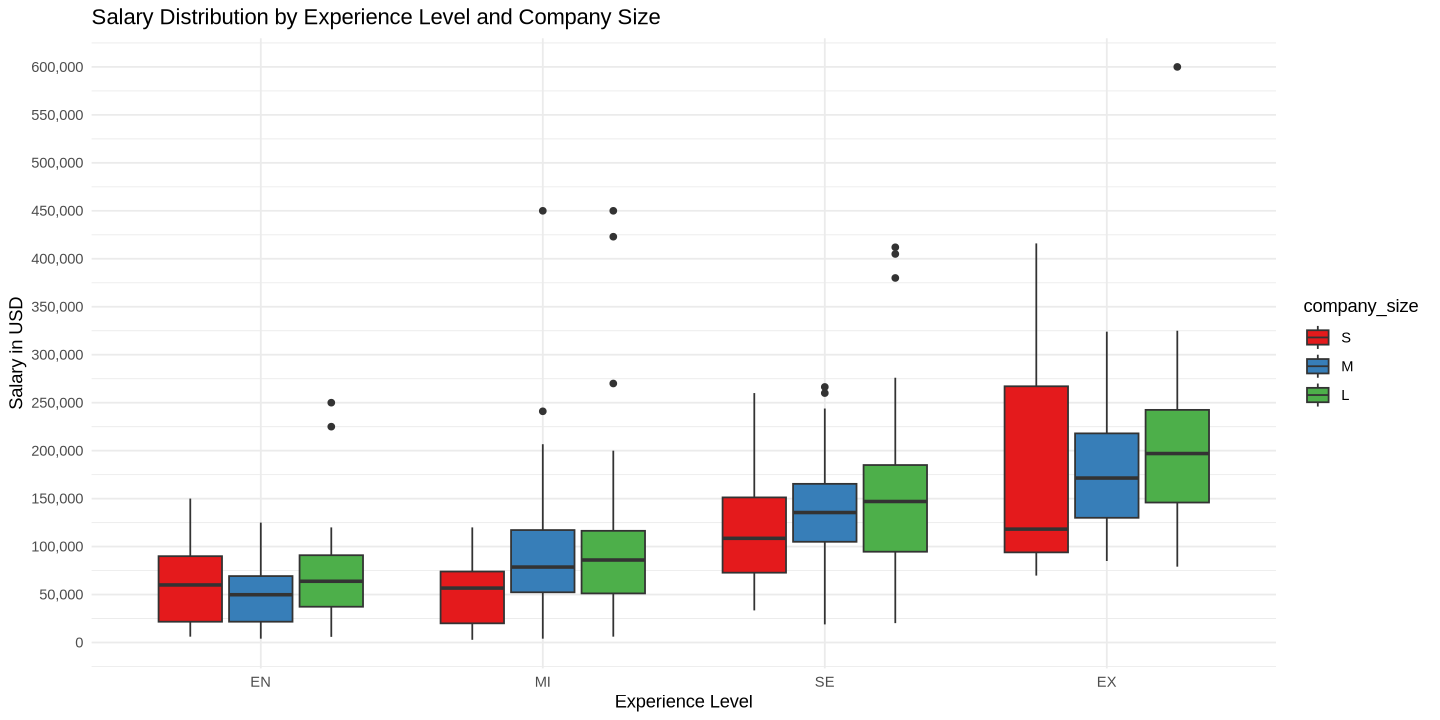

In [5]:
# Factor the experience_level and company_size in increasing order
salary_data$experience_level <- factor(salary_data$experience_level, levels = c("EN", "MI", "SE", "EX"))
salary_data$company_size <- factor(salary_data$company_size, levels = c("S", "M", "L"))

# Transform remote_ratio to more descriptive categories
salary_data$remote_ratio <- factor(salary_data$remote_ratio, levels = c("0", "50", "100"),
                                   labels = c("In-Person", "Hybrid", "Online"))

box_plot <- ggplot(salary_data, aes(x = experience_level, y = salary_in_usd, fill = company_size)) +
  geom_boxplot() +
  labs(title = "Salary Distribution by Experience Level and Company Size", x = "Experience Level", y = "Salary in USD") +
  scale_y_continuous(labels = scales::comma, breaks = seq(0, max(salary_data$salary_in_usd), by = 50000)) +
  scale_fill_brewer(palette = "Set1") +
  theme_minimal()
box_plot

## Adding Remote Ratio in the Analysis

Initially, we considered including the `remote_ratio` variable within the box plot. However, this added a level of complexity that resulted in a cluttered visualization. The remote ratio variable, which classifies jobs as In-Person, Hybrid, or Online, is crucial for understanding salary dynamics. To avoid overcomplicating the box plot and to maintain clarity, we opted for a separate bar graph to analyze the impact of the remote ratio on salaries. Here's why the bar graph was chosen:

- **X-axis**: Represents the experience levels, ordered from `EN` (Entry-level/Junior) to `EX` (Executive-level/Director).
- **Y-axis**: Shows the salary in USD.
- **Bars**: Each bar is stacked corresponding to the avg salary of the remote ratio.

The bar graph shows that remote ratio may also be a variable that affects salary of an employee as we see increases when the employee is working in person.

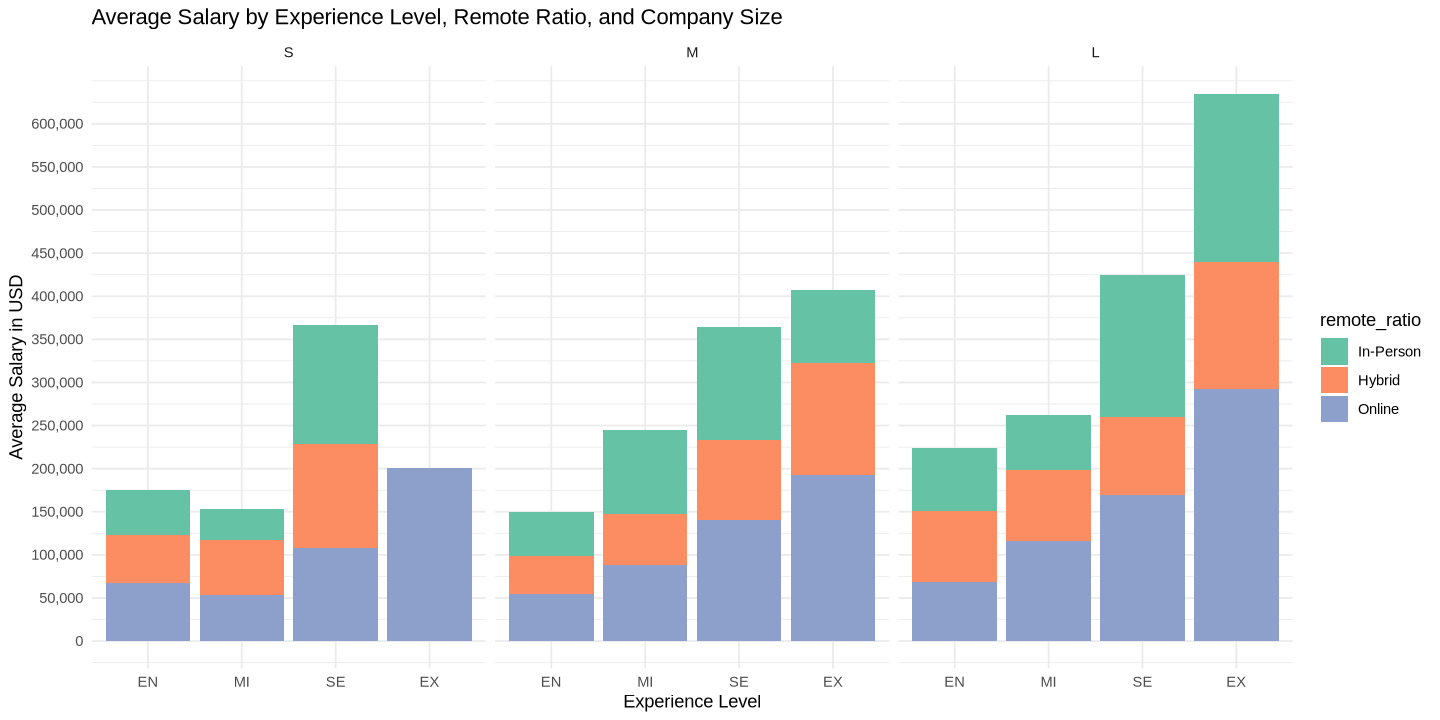

In [6]:
salary_summary <- salary_data %>%
  group_by(experience_level, remote_ratio, company_size) %>%
  summarise(mean_salary = mean(salary_in_usd), .groups = 'drop') %>%
  ungroup() %>%
  mutate(company_size = factor(company_size, levels = c("S", "M", "L")))

bar_plot <- ggplot(salary_summary, aes(x = experience_level, y = mean_salary, fill = remote_ratio)) +
  geom_bar(stat = "identity", position = "stack") +
  facet_wrap(~ company_size) +
  labs(title = "Average Salary by Experience Level, Remote Ratio, and Company Size", x = "Experience Level", y = "Average Salary in USD") +
  scale_y_continuous(labels = scales::comma, breaks = seq(0, max(salary_data$salary_in_usd), by = 50000)) +
  scale_fill_brewer(palette = "Set2") +
  theme_minimal()

bar_plot

# Methods and Plan

The method described involves several detailed steps in implementing a logistic regression model for predicting whether salaries are above or below the median. Let's break down each step:

1. **Data Preprocessing:**

    - **Binary Outcome for Salary:** The first step involves categorising the `salary_in_usd` variable into a binary outcome, where salaries are classified as either above or below the median. This simplification facilitates the modelling process.
    - **Simplification of Job Titles:** Due to the complexity and variety of job titles, the job_title column is simplified to manage the data effectively. Specific job titles are grouped into broader categories to reduce complexity and potential biases.
      
2. **Data Splitting:**

    - The dataset is divided into training and testing sets to train the model on one subset and evaluate its performance on another. This ensures an unbiased assessment of the model's predictive ability.

3. **Categorical Variable Encoding:**

    - Categorical variables such as `experience_level`, `company_size`, `employment_type`, `salary_currency`, and the simplified `job_title` categories are converted into factors. This conversion is necessary for the logistic regression model to interpret these variables correctly.

4. **Model Training:**

    - **Logistic Regression:** A logistic regression model is chosen as the predictive model. This model is suitable for binary classification tasks, making it appropriate for predicting whether salaries are above or below the median. We also only had one valid response variable which was the salary, so we could only use logistic regression
    - **Predictor Selection:** The model is trained using a combination of predictors, including `experience_level`, `job_title_simplified`, `company_size`, `employment_type`, and `salary_currency`. We decided to use most predictors in order to identify the significant predictors and to provide a comprehensive model whilst increasing predictive power, we also wanted to handle any confounding variables if there were any.

5. **Model Evaluation:**

    - **Predictions on Test Data**: The trained model is used to make predictions on the test dataset.
    - **Confusion Matrix**: A confusion matrix is used to evaluate the model's performance. We use it to provide a breakdown of true positives, false positives, true negatives, and false negatives, giving insights into the model's ability to make correct predictions.
    - **Accuracy Calculation**: Model accuracy is calculated by summing the diagonal elements of the confusion matrix and dividing by the total number of observations. We used this method to provide an ideal source of accuracy calculation for us to evaluate.

# Implementation Of A Proposed Model

Below is the implementation of the logistic regression model. We selected the combination of predictors that gives the highest accuracy. Unfortunately, we couldn't use "job location" as a predictor because it contained too many categorical values, and new values appeared in the testing data that weren't present in the training data. A similar issue arose with the "job title" data, which led us to simplify this category.

## Steps

  - Convert salary_in_usd into a binary outcome, categorizing salaries as either above or below the median.
  - Simplify the job_title column to manage the variety and complexity of data while being cautious about potential biases.
  - Test all combinations of predictors to identify the one that provides the highest accuracy.
  - Remove any predictors that are found to be insignificant.
  - Finalize the model based on the refined set of predictors.

In [7]:
# Simplifying job_title with custom categories
salary_data$job_title <- as.character(salary_data$job_title) 
salary_data$job_title_simplified <- ifelse(grepl("Data Scientist", salary_data$job_title), "Data Scientist",
                                 ifelse(grepl("Data Engineer", salary_data$job_title), "Data Engineer",
                                 ifelse(grepl("Machine Learning", salary_data$job_title), "Machine Learning Engineer",
                                 ifelse(grepl("Product Data Analyst", salary_data$job_title), "Product Data Analyst",
                                 ifelse(grepl("Lead Data Analyst", salary_data$job_title), "Lead Data Analyst",
                                 ifelse(grepl("Lead Data Engineer", salary_data$job_title), "Lead Data Engineer",
                                 ifelse(grepl("Lead Data Scientist", salary_data$job_title), "Lead Data Scientist",
                                 ifelse(grepl("Data Analyst", salary_data$job_title), "Data Analyst", "Other"))))))))

# Binarizing the salary variable around its median
median_salary <- median(salary_data$salary_in_usd, na.rm = TRUE)
salary_data$salary_above_median <- ifelse(salary_data$salary_in_usd > median_salary, 1, 0)

# Splitting data into training and testing set
set.seed(123) 
indexes <- createDataPartition(salary_data$salary_above_median, p = 0.75, list = FALSE)
train_data <- salary_data[indexes, ]
test_data <- salary_data[-indexes, ]

# Converting categorical variables to factors
categorical_vars <- c('experience_level', 'work_year', 'employment_type', 'salary_currency', 'company_size', 'job_title_simplified')
train_data[categorical_vars] <- lapply(train_data[categorical_vars], factor)
test_data[categorical_vars] <- lapply(test_data[categorical_vars], factor)

# Fitting a logistic regression model
model <- glm(salary_above_median ~ experience_level + job_title_simplified + company_size + employment_type + salary_currency, 
             data = train_data, family = binomial())

# Predicting on test data
test_data$predicted_prob <- predict(model, newdata = test_data, type = "response")
test_data$predicted_binary <- ifelse(test_data$predicted_prob > 0.5, 1, 0)

conf_matrix <- table(Predicted = test_data$predicted_binary, Actual = test_data$salary_above_median)

# Convert the confusion matrix to a dataframe for ggplot2
conf_matrix_df <- as.data.frame(conf_matrix)
names(conf_matrix_df) <- c("Predicted", "Actual", "Frequency")

summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = salary_above_median ~ experience_level + job_title_simplified + 
    company_size + employment_type + salary_currency, family = binomial(), 
    data = train_data)

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                    -43.56874 7261.53191  -0.006
experience_levelMI                               1.57922    0.51700   3.055
experience_levelSE                               3.28396    0.52923   6.205
experience_levelEX                               5.35604    1.04780   5.112
job_title_simplifiedData Engineer                1.17696    0.40594   2.899
job_title_simplifiedData Scientist               2.09242    0.44781   4.673
job_title_simplifiedLead Data Analyst            0.08152    1.59574   0.051
job_title_simplifiedMachine Learning Engineer    2.55606    0.59492   4.296
job_title_simplifiedOther                        2.00824    0.50435   3.982
job_title_simplifiedProduct Data Analyst

## Confusion Matrix Plot

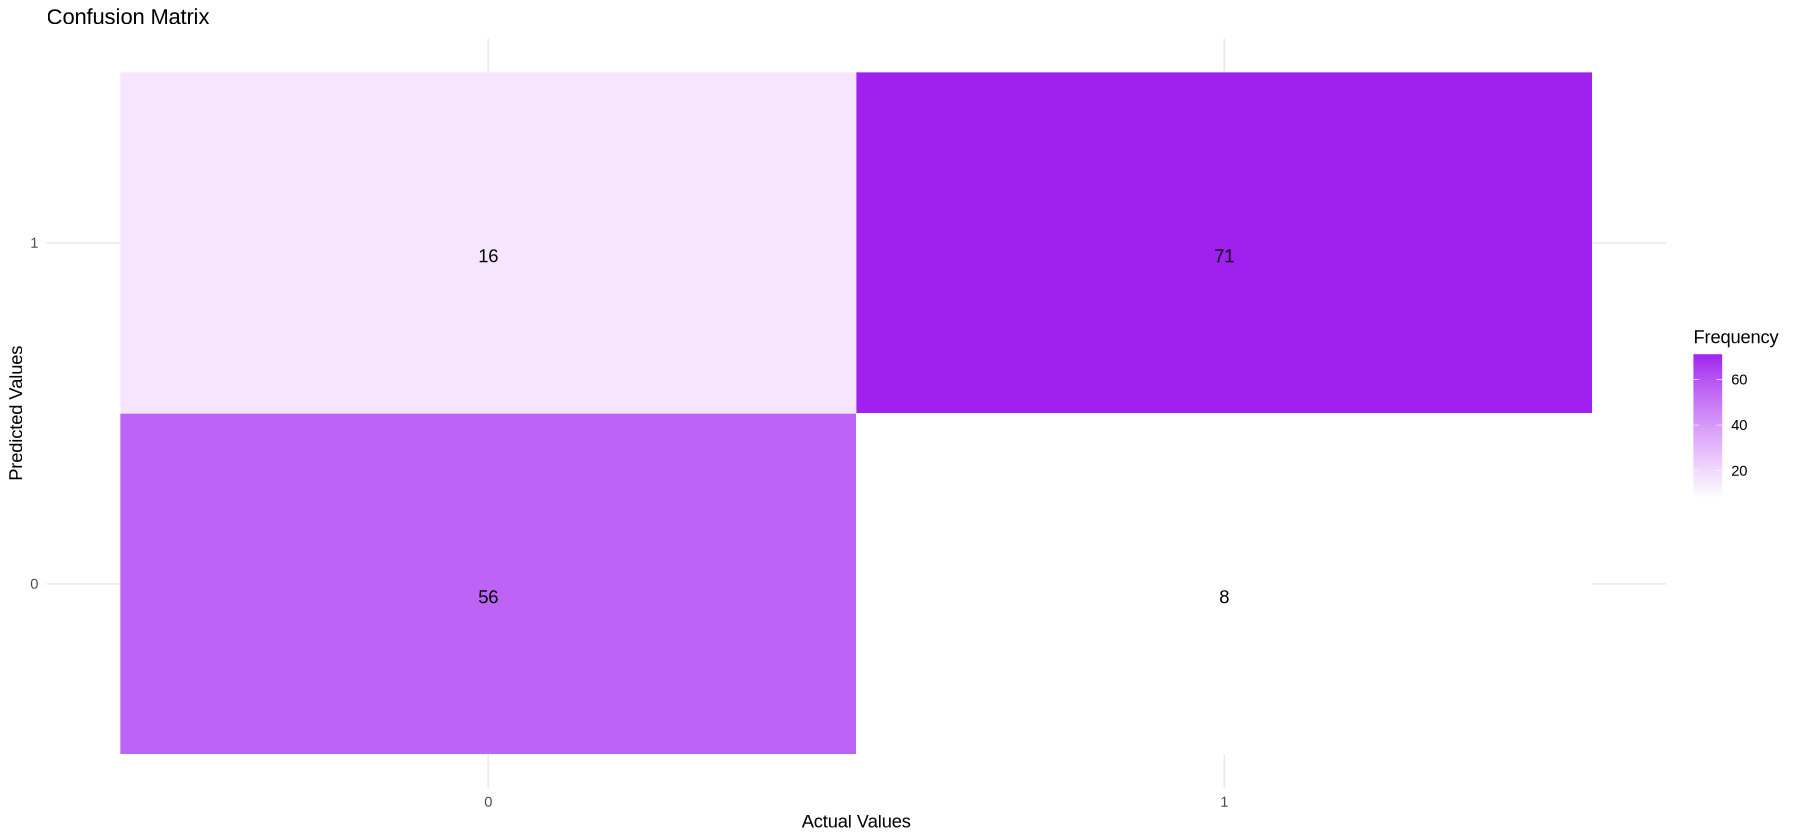

In [8]:
options(repr.plot.width = 15, repr.plot.height = 7) 

ggplot(conf_matrix_df, aes(x = Actual, y = Predicted, fill = Frequency)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Frequency), vjust = 1.5) +
  scale_fill_gradient(low = "white", high = "purple") +
  labs(title = "Confusion Matrix", x = "Actual Values", y = "Predicted Values", fill = "Frequency") +
  theme_minimal()

## Accuracy

In [9]:
accuracy <- sum(diag(as.matrix(conf_matrix))) / sum(conf_matrix)
print(paste("The accuracy of the model is", round(accuracy * 100, 2),"%"))

[1] "The accuracy of the model is 84.11 %"


# Results

Based on the confusion matrix, we can derive the following insights:

  - True Positives (TP): The model accurately predicted 71 cases where employees have a salary above the median.
  - True Negatives (TN): The model correctly identified 56 cases where employees have a salary below the median.
  - False Positives (FP): There were 8 instances where the model incorrectly predicted employees to have a salary above the median when they actually don't.
  - False Negatives (FN): The model failed to identify 16 cases where employees have a salary above the median.
    
With an accuracy of 84.11%, the model demonstrates a commendable performance in distinguishing between salaries above and below the median. However, to further enhance its predictive ability, particularly in correctly identifying true positives, adjustments can be made to the classification threshold. However, the simplification of the `job_title` category could introduce bias if it is too coarse or misses subtleties in the data. Additionally, the inability to use `job_location` could limit the model's accuracy since location can significantly impact salaries.

# Discussion

### **Model Performance and Limitations:** 

  - Our logistic regression model demonstrated a strong capability to predict salary classifications above and below the median with an overall accuracy of 84.11%. However, after reading the confusion matrix we noticed a flaw in our model: the model produced 16 false negatives, indicating a consistent underestimation of employees with salaries above the median. This means that the model may benefit from changing the measure used for classification or ignoring extreme outliers. Changing this could improve its sensitivity, reducing the number of high earners incorrectly classified as low earners.

### **Suggestions for Model Improvement:**

  - In the future we can make many adjustments. Firstly, we can incorporate interaction terms between variables such as experience level, job title, and company size could provide deeper insights into how these factors interplay to affect salary outcomes. Such an approach could reveal some dynamics that a simple logistic model might overlook. Additionally, fine-tuning the classification threshold would help in better distinguishing between the two salary categories, potentially increasing the model's accuracy and reducing type I and type II errors.

### **Future Research Directions:**

  - For future versions of the study, considering alternative machine learning algorithms could be beneficial. Furthermore, expanding the dataset to include more diverse variables such as industry-specific data, regional economic indicators, and educational levels could enhance the model's comprehensiveness and accuracy. Extra data will also allow us to use `job_location` and `job_title` columns without restriction which may give us a higher prediction accuracy. We can also find continuous variables like years of experience that can help us better predict the salary better. These expansions would not only improve model performance but also broaden the scope of the research, making the findings more generalizable across different sectors and locations.

## References:

  - DuBois, J. (2020). The Data Scientist Shortage in 2020: https://www.quanthub.com/data-scientist-shortage-2020/
  - Lothe, P. D., Tiwari, P., Patil, N., Patil, S., & Patil, V. (2021): https://www.ijasret.com/VolumeArticles/FullTextPDF/842_47._SALARY_PREDICTION_USING_MACHINE_LEARNING.p